----
# **Project: Exploratory Data Analysis - COVID Deaths and Vaccinations**
**By: [Franklin Posso](https://www.linkedin.com/in/franklinposso/)**



# **Objective:**

 The objective is to give insights of COVID-19. For that, It will be shown how is the number of deaths and vaccinations for each continent and country. This analysis is based on real data about covid 19 from January 2020 to July 2021 using My SQL. 

**For the project some steps has been followed:**  
1 - Table creation for deaths and vaccinations.  
2 - Loading of datasets using Command Line Client.  
3 - Exploratory analysis using aggregations, joins, window fuction, common table expressions (CTE) and views.  

# **Dataset download:**  

The dataset used for this analysis can be downloaded at my Kaggle: https://www.kaggle.com/datasets/franklinposso/covid-dataset-sql 

Or the newest and updated dataset can be downloaded at: https://ourworldindata.org/covid-deaths

# **Creating tables:**

 **Table covid_deaths**
 
**Query:**  
CREATE TABLE covid_db.covid_deaths (  
  `iso_code` TEXT,  
  `continent` TEXT,  
  `location` TEXT,  
  `date` TEXT,  
  `population` BIGINT,  
  `total_cases` BIGINT,  
  `new_cases` BIGINT,  
  `new_cases_smoothed` FLOAT,  
  `total_deaths` BIGINT,  
  `new_deaths` BIGINT,  
  `new_deaths_smoothed` FLOAT,  
  `total_cases_per_million` BIGINT,  
  `new_cases_per_million` BIGINT,  
  `new_cases_smoothed_per_million` BIGINT,  
  `total_deaths_per_million` BIGINT,  
  `new_deaths_per_million` BIGINT,    
  `new_deaths_smoothed_per_million` FLOAT,    
  `reproduction_rate` BIGINT,  
  `icu_patients` BIGINT,  
  `icu_patients_per_million` BIGINT,  
  `hosp_patients` BIGINT,  
  `hosp_patients_per_million` BIGINT,  
  `weekly_icu_admissions` BIGINT,  
  `weekly_icu_admissions_per_million` BIGINT,  
  `weekly_hosp_admissions` BIGINT,  
  `weekly_hosp_admissions_per_million` BIGINT  
);


**Table Covid_Vaccination**

**Query:**  
CREATE TABLE covid_db.covid_vaccination (  
  `iso_code` TEXT,  
  `continent` TEXT,  
  `location` TEXT,  
  `date` TEXT,  
  `new_tests` BIGINT,  
  `total_tests` BIGINT,  
  `total_tests_per_thousand` BIGINT,  
  `new_tests_per_thousand` BIGINT,  
  `new_tests_smoothed` BIGINT,  
  `new_tests_smoothed_per_thousand` FLOAT,  
  `positive_rate` FLOAT,  
  `tests_per_case` FLOAT,  
  `tests_units` BIGINT,  
  `total_vaccinations` BIGINT,  
  `people_vaccinated` BIGINT,  
  `people_fully_vaccinated` BIGINT,  
  `new_vaccinations` BIGINT,  
  `new_vaccinations_smoothed` BIGINT,  
  `total_vaccinations_per_hundred` FLOAT,  
  `people_vaccinated_per_hundred` FLOAT,  
  `people_fully_vaccinated_per_hundred` FLOAT,  
  `new_vaccinations_smoothed_per_million` BIGINT,  
  `stringency_index` FLOAT,  
  `population_density` FLOAT,  
  `median_age` FLOAT,  
  `aged_65_older` FLOAT,  
  `aged_70_older` FLOAT,  
  `gdp_per_capita` FLOAT,  
  `extreme_poverty` FLOAT,  
  `cardiovasc_death_rate` FLOAT,  
  `diabetes_prevalence` FLOAT,  
  `female_smokers` FLOAT,  
  `male_smokers` FLOAT,  
  `handwashing_facilities` FLOAT,  
  `hospital_beds_per_thousand` FLOAT,  
  `life_expectancy` FLOAT,  
  `human_development_index` FLOAT,  
  `excess_mortality` FLOAT  
);

### Loading tables through MySql Command Line

 The two CSV files will be uploaded into the database created as "covid_db".
 
 **Loading first file: covid_deaths.csv**  
 **query:**  
 LOAD DATA LOCAL INFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/covid_deaths.csv' INTO TABLE 'covid_db'.'covid_deaths' CHARACTER SET 
UTF8 FIELDS TERMINATED BY ',' ENCLOSED BY '"' LINES TERMINATED BY '\r\n' IGNORE 1 LINES;  


**Loading second file: covid_vaccination.csv**  
**query:**  
LOAD DATA LOCAL INFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/covid_vaccination.csv' INTO TABLE 'covid_db'.'covid_vaccination' CHARACTER SET UTF8 FIELDS TERMINATED BY ',' ENCLOSED BY '"' LINES TERMINATED BY '\r\n' IGNORE 1 LINES;


### Updating date fomat
**query:**  
UPDATE covid_db.covid_deaths  
SET date = str_to_date(date,'%d/%m/%y');   

**query:**  
UPDATE covid_db.covid_vaccination  
SET date = str_to_date(date,'%d/%m/%y');  



# **Exploratory analysis**

### **How many lines does the dataset have?**
**Query:**   
SELECT COUNT(*)   
FROM covid_db.covid_deaths;   
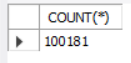

 
**Query:**  
SELECT COUNT(*)  
FROM covid_db.covid_vaccination;  

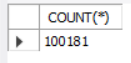

 Both files have 100.181 lines each, but not the same quantity of columns.
   
   
   
 ### **Exploring some important columns of the dataset covid.deaths.csv**


 **Query:**  
SELECT date, continent, location, total_cases, new_cases, total_deaths, population    
FROM covid_db.covid_deaths    
ORDER BY location, date;    


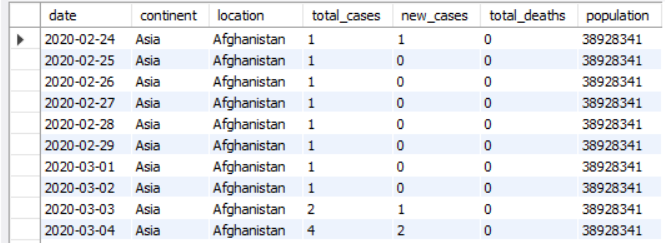

### **Checking for duplicate values**
**Deaths table**
**Query:**  
SELECT date, continent, location,  
COUNT(*) as Checking_Dup  
FROM covid_db.covid_deaths  
GROUP BY date, continent, location    
HAVING Checking_Dup > 1  

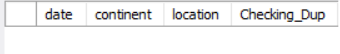

**Vaccination table**
**Query:**    
SELECT date, continent, location,  
COUNT(*) as Checking_Dup  
FROM covid_db.covid_vaccination  
GROUP BY date, continent, location    
HAVING Checking_Dup > 1  

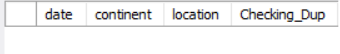

 Neither deaths nor vaccinations dataset have duplicate value.
 
 
 ### **Checking the quantity of continents and countries**
 
**Continents** 

**Query:**  
SELECT COALESCE(continent, "Total") as Continent,  
COUNT(continent) as Count    
FROM(SELECT DISTINCT continent    
FROM covid_db.covid_deaths) as Subquery    
GROUP BY continent with rollup    
ORDER BY continent    

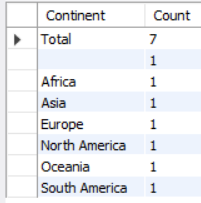

 The dataset has a total of 6 continents. Where 1 field was counted as "continent" is actually composed of empty values.
 
**Countries** 

**Query:**  
SELECT COUNT(location) as Qtt_Countries  
FROM(SELECT DISTINCT location  
FROM covid_db.covid_deaths) as Subquery

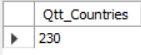

 The quantity os countries in the covid_deaths dataset is 230.
 
 
 ### **Average number of deaths by day (Continents and Countries)**
 
 **Query:**  
SELECT location,  
ROUND(AVG(new_deaths)) AS Deaths_Average_Day  
FROM covid_db.covid_deaths  
GROUP BY location  
ORDER BY Deaths_Average_Day DESC;  

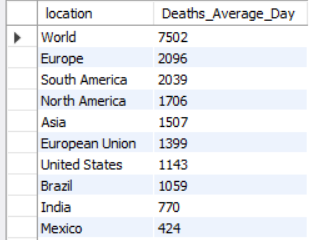

Usa, Brazil and India are the top 3 in the number of deaths. But this information is not enough to say if they are also the higher percentage of deaths versus population.

### **Average of cases divided by the number of population of each country (TOP 10)**

**Query:**  
SELECT continent, location,  
ROUND(AVG((total_cases / population) * 100), 2) AS Percentage_Population  
FROM covid_db.covid_deaths  
GROUP BY location  
ORDER BY Percentage_Population DESC  
LIMIT 10;  

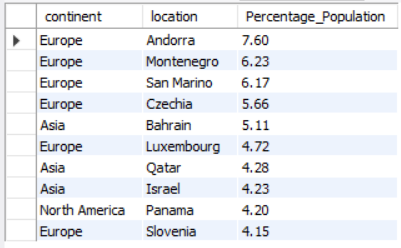

This is the percentage of deaths from covid divided by the population of each country. Of the 10 countries, 6 are from Europe, 3 from Asia and 1 from North America.


### **Considering the highest value of total cases, which countries have the highest rate of infection in relation to population?**

**Query:**  
SELECT location,  
MAX(total_cases) AS Max_of_Cases,  
population,  
ROUND(MAX(total_cases / population * 100), 2) AS Perc_Pop_Infected FROM covid_db.covid_deaths  
WHERE continent IS NOT NULL  
GROUP BY location, population  
ORDER BY Perc_Pop_Infected DESC  
LIMIT 10;   

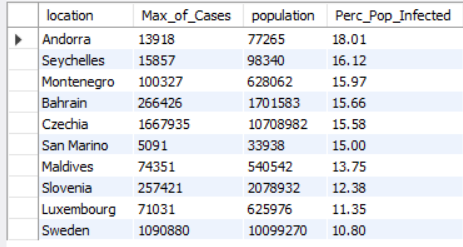

The top three countries with highest percentage of people infected is: Andorra, Seychelles and Montenegro.


### **Countries with the highest number of deaths**

**Query:**  
SELECT location,  
MAX(total_deaths) AS Max_of_Deaths   
FROM covid_db.covid_deaths     
WHERE continent IS NOT NULL     
GROUP BY location    
ORDER BY Max_of_Deaths DESC;

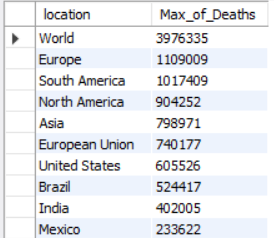

### **Continents with the highest number of deaths**

**Query:**  
  SELECT continent,  
  MAX(total_deaths) as Highest_Death  
  FROM covid_db.covid_deaths   
  WHERE continent IS NOT NULL   
  GROUP BY continent   
  ORDER BY Highest_Death  DESC;  
  
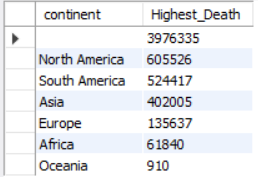
  
### **Number of new vaccinated and rolling average of new vaccinated over time by country on the European continent**
  
   With window function and inner join.
   
**Query:**  
SELECT deaths.continent, deaths.location, deaths.date, vaccination.new_vaccinations,  
AVG(vaccination.new_vaccinations) OVER (PARTITION BY deaths.location ORDER BY deaths.date) as RollingAvg_Vaccines  
FROM covid_db.covid_deaths deaths  
JOIN covid_db.covid_vaccination vaccination  
ON deaths.location = vaccination.location  
AND deaths.date = vaccination.date  
WHERE deaths.continent = 'Europe'  
ORDER BY location, date;   

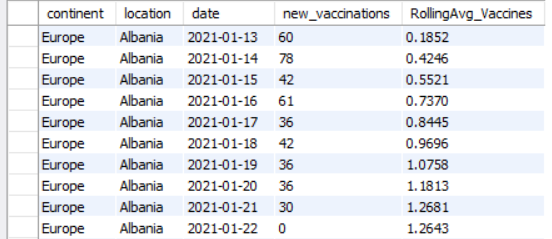


 This result show us the new vaccinations day by day and the rolling average over time.   
 The decision to use window function instead of subquery was due to performance reasons.

# **Creating a view with the CTE**

The previous query could be used for many different analyses, so I decided to create a view with this query.

**Query:**  
**CREATE OR REPLACE VIEW** covid_db.percentage_vacvspop AS   
WITH Temp_VacVsPop (continent, location, date, population, new_vaccinations, RollingAvg_Vaccination) AS  
(  
SELECT deaths.continent, deaths.location, deaths.date, deaths.population, vaccination.new_vaccinations,    
SUM(vaccination.new_vaccinations) OVER (PARTITION BY deaths.location  
ORDER BY deaths.date) AS RollingAvg_Vaccination 
FROM covid_db.covid_deaths deaths  
JOIN covid_db.covid_vaccination vaccination  
ON deaths.location = vaccination.location  
AND deaths.date = vaccination.date  
)  

SELECT *, (RollingAvg_Vaccination / population) * 100 AS Percentage_1_Dose  
FROM Temp_VacVsPop

  
 
### **Total vaccinated with at least 1 dose over time (All countries)**

 **Query:**  
SELECT *      
FROM covid_db.percentage_vacvspop;     
  
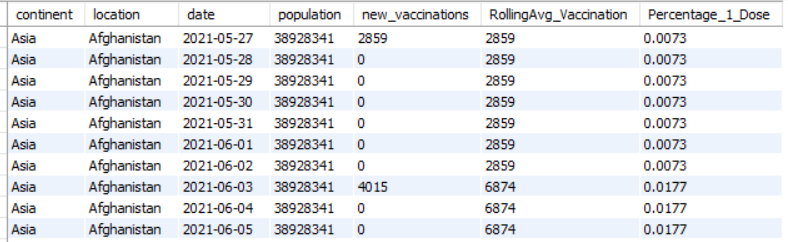



### **Percentage of the population vaccinated with at least the first dose until 30/6/2021 (Top 3)**

**Query:**  
SELECT *        
FROM covid_db.percentage_vacvspop  
WHERE (location = "United States"  
OR location = "Brazil"  
OR location = "india"  
OR location = "Mexico"  
OR location = "Peru")  
AND DATE = "2021-06-30"  
ORDER BY Percentage_1_Dose DESC;  

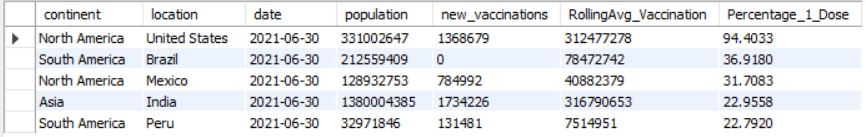

This result represents the top 5 countries with the highest levels of deaths count.
It is possible to see that United States is very ahead of the other countries. USA has 94.40% of the population with at least the first dose. The other countries have between 22% and 37%.

# **Conclusion**

1 - Usa, Brazil and India are the top 3 in the number of deaths. 

2 - The top three countries with highest percentage of people infected is: Andorra, Seychelles and Montenegro.   

3 - In Brazil at the beginning of May/2021, the percentage of the population vaccinated with at least the first dose was 18.50%, and at the end of May/2021 this percentage was 26.11%.  

4 - Despite Usa having the highest number of deaths, we can see that it is also the pioneer in the application of vaccines. As of 06/30/2021, the United States applied the first dose to 94% of the population, while Brazil, for example, applied it to 37% and Mexico to 32%.  


**Ps.** This is a prior analysis of the data. for a greater visualization it would be more interesting to use a visualization tool like Power Bi or Tableau..